In [1]:
from google.colab import files
uploaded = files.upload()


Saving bollywood-1.csv to bollywood-1.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
df = pd.read_csv(io.BytesIO(uploaded['bollywood-1.csv']));
#1
df.SlNo.count()
#will tell us the number of records

149

In [3]:
#2
print(df.ReleaseTime.value_counts())
df.sort_values(by="ReleaseTime", ascending = False)

N     99
HS    18
FS    17
LW    15
Name: ReleaseTime, dtype: int64


,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes
74,75,25-Apr-14,Revolver Rani,N,Drama,24,10.00,1744602,3013,392
65,66,28-Mar-14,O Teri,N,Comedy,21,3.75,1511318,3004,278
75,76,28-Feb-14,Shaadi Ke Side Effects,N,Comedy,50,37.80,4590539,9021,1465
1,2,4-Jan-13,Table No. 21,N,Thriller,10,12.00,1087320,1129,137
73,74,29-Aug-14,Raja Natwarlal,N,Thriller,35,29.60,4050407,8197,1155
...,...,...,...,...,...,...,...,...,...,...
121,122,8-Nov-13,Satya 2,FS,Thriller,15,1.10,110315,89,26
122,123,15-Nov-13,Rajjo,FS,Romance,12,2.00,1718619,1606,1083
40,41,8-Mar-13,"Saheb, Biwi Aur Gangster Returns",FS,Drama,15,22.00,1176596,1037,189
125,126,11-Oct-13,War Chhod Na Yaar,FS,Comedy,14,7.50,40450,33,7


In [5]:
#3
df[(df['ReleaseTime']=="FS")].groupby("Genre").size().idxmax()

' Drama '

In [6]:
#4
pd.crosstab(df.ReleaseTime,df.Genre)

Genre,Drama,Action,Action,Comedy,Romance,Thriller,Thriller
ReleaseTime,,,,,,,
FS,4,3,0,3,3,4,0
HS,6,3,0,5,3,1,0
LW,1,3,0,5,4,1,1
N,24,12,3,23,15,20,2


In [7]:
#5
df.loc[:,"Release Date"].str[-2:].value_counts().idxmax()

'14'

In [8]:
#6
x = df.loc[:,["Release Date","Budget"]].Budget>=30
y = df[x]
y.loc[:,"Release Date"].str[-6:-3].value_counts().idxmax()

'Feb'

In [9]:
#7
df['ROI'] = (df.BoxOfficeCollection - df.Budget)/(df.Budget)
df.sort_values(by="ROI").head(10)

,SlNo,Release Date,MovieName,ReleaseTime,Genre,Budget,BoxOfficeCollection,YoutubeViews,YoutubeLikes,YoutubeDislikes,ROI
9,10,11-Jan-13,Gangoobai,N,Drama,2,0.01,4354,1,1,-0.995000
15,16,18-Jan-13,Bandook,N,Action,4,0.09,28391,8,14,-0.977500
53,54,22-Mar-13,Sona Spa,N,Thriller,10,0.24,79430,61,112,-0.976000
3,4,4-Jan-13,Rajdhani Express,N,Drama,7,0.35,42626,86,19,-0.950000
49,50,2-May-14,Kya Dilli Kya Lahore,HS,Drama,7,0.50,492344,2018,64,-0.928571
121,122,8-Nov-13,Satya 2,FS,Thriller,15,1.10,110315,89,26,-0.926667
67,68,2-May-14,Purani Jeans,HS,Romance,10,1.10,1537063,822,229,-0.890000
103,104,25-Apr-14,Samrat and Co.,N,Thriller,18,2.00,371133,532,180,-0.888889
30,31,7-Feb-14,Heartless,N,Thriller,12,1.50,4823892,5797,227,-0.875000
102,103,25-Apr-14,Kaanchi,N,Drama,31,4.00,2360968,2807,595,-0.870968


In [10]:
#8
print("ROI for Festive Season:")
print(df.sort_values(by="ReleaseTime").iloc[:17].ROI.mean())
print("ROI for Long Weekend:")
print(df.sort_values(by="ReleaseTime").iloc[35:50].ROI.mean())
print("ROI for Holiday Season:")
print(df.sort_values(by="ReleaseTime").iloc[17:35].ROI.mean())
print("ROI for :Normal:")
print(df.sort_values(by="ReleaseTime").iloc[50:].ROI.mean())
#hence from the data, we can say movies released during festive seasons and long weekends have a higher ROI


ROI for Festive Season:
0.9738532013595953
ROI for Long Weekend:
1.1272053098737975
ROI for Holiday Season:
0.8508667840873723
ROI for :Normal:
0.6577216305350877


In [12]:
#9
df['BoxOfficeCollection'].corr(df['YoutubeLikes'])
#hence the correlation is positive

0.6825165877731297

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


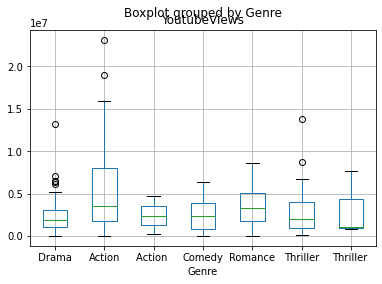

In [11]:
#10
df.boxplot(by ='Genre', column =['YoutubeViews'])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff48ae7e4d0>,
      dtype=object)

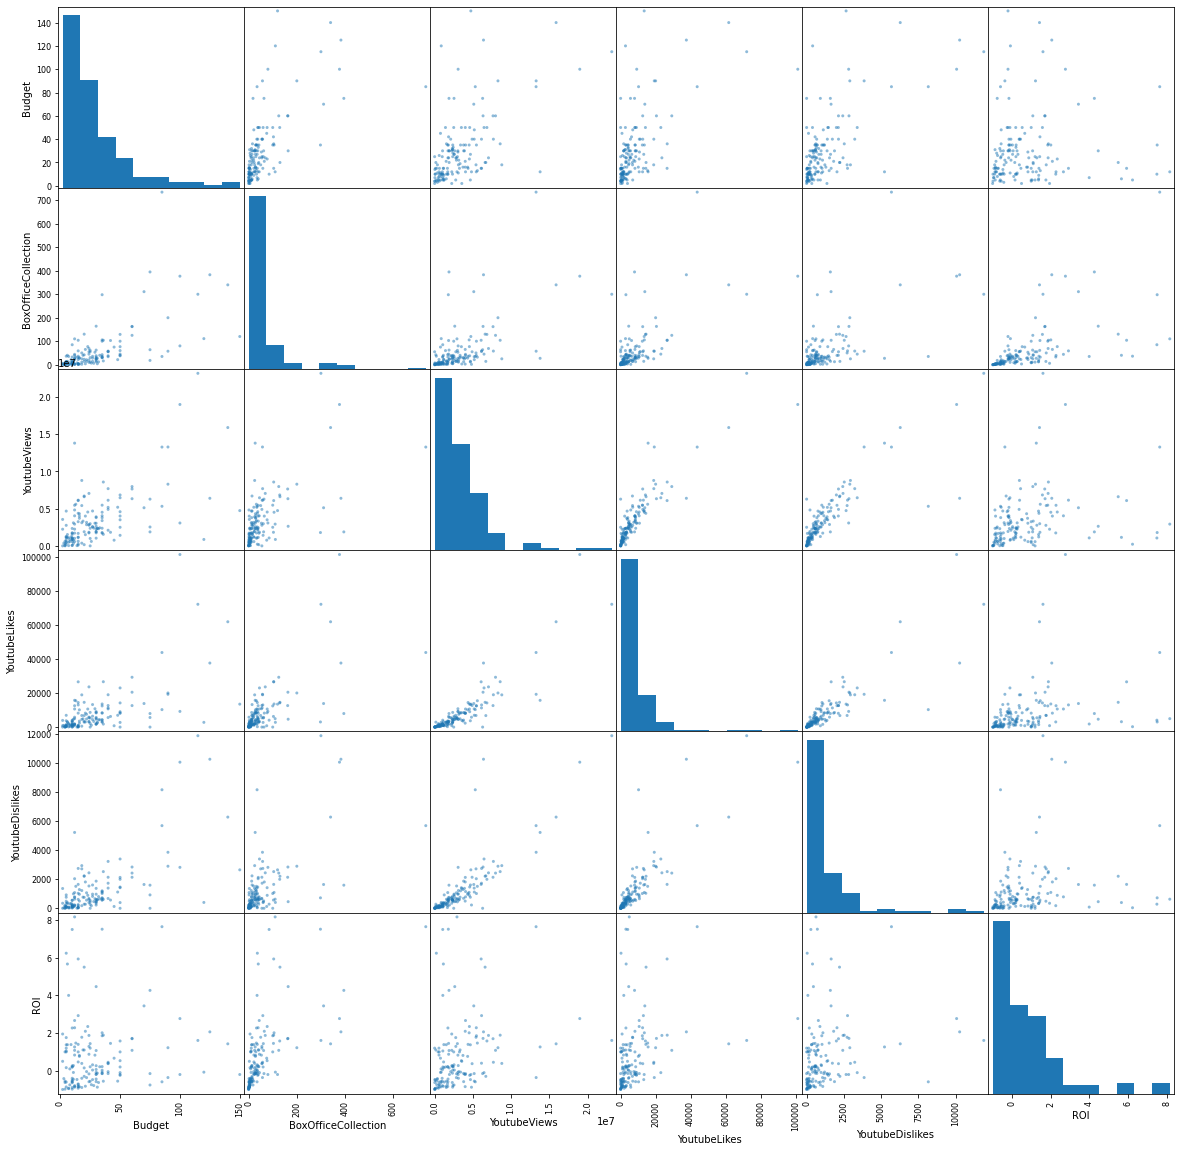

In [14]:
#11
pd.plotting.scatter_matrix(df.iloc[:,5:], figsize=(20,20))
#giving us YTV and YTL

<BarContainer object of 7 artists>

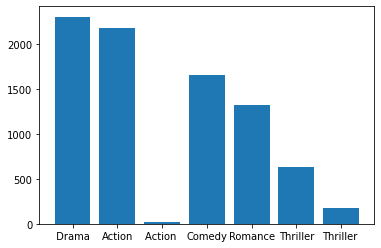

In [57]:
#12
c = df.groupby('Genre')
d = c['BoxOfficeCollection'].sum().reset_index(name='TotalCollection')
y = d['TotalCollection']
x = d['Genre']
plt.bar(x,y)

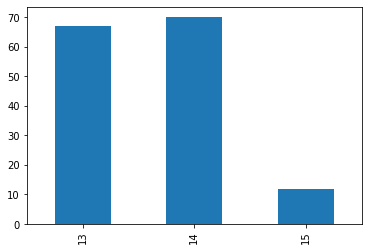

In [48]:
#13
df.loc[:,"Release Date"].str[-2:].value_counts().sort_index().plot(kind = 'bar')


<BarContainer object of 7 artists>

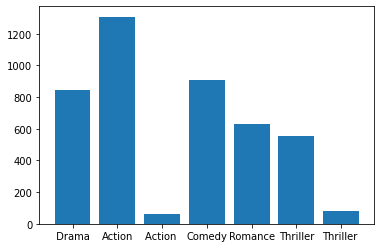

In [58]:
#14
#already have c from q 12
d = c['Budget'].sum().reset_index(name='Total')
x = d['Genre']
y = d['Total']
plt.bar(x,y)

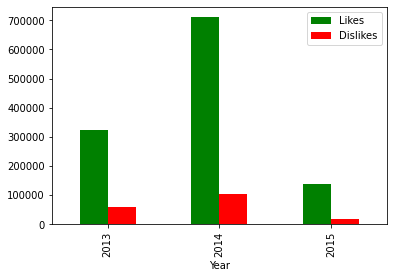

In [98]:
#15
x = pd.DataFrame()
x['Year'] = "2013","2014","2015"
x['Likes'] = df[df.loc[:,"Release Date"].str[-2:]=='13'].YoutubeLikes.sum(), df[df.loc[:,"Release Date"].str[-2:]=='14'].YoutubeLikes.sum(), df[df.loc[:,"Release Date"].str[-2:]=='15'].YoutubeLikes.sum()
x['Dislikes'] = df[df.loc[:,"Release Date"].str[-2:]=='13'].YoutubeDislikes.sum(), df[df.loc[:,"Release Date"].str[-2:]=='14'].YoutubeDislikes.sum(), df[df.loc[:,"Release Date"].str[-2:]=='15'].YoutubeDislikes.sum()
x.plot(x="Year", y=["Likes", "Dislikes"], color =["green","red"], kind = "bar")